In [96]:
sra_metadata_filename = "/home/ec2-user/erc-unitigs-poc/Athena_Sept_19_public.acc_mbases.txt"

acc_size = dict()
with open(sra_metadata_filename) as f:
    f.readline()
    for line in f:
        acc, size = line.split()
        size = int(size)
        acc_size[acc] = size
    
print(len(acc_size))

26475979


In [97]:
import boto3
from boto3.dynamodb.conditions import Key, Attr
# Initialize the SimpleDB client
client = boto3.client('sdb')

region='us-east-1'
domain_name = "serratus-batch-unitigs"

query_expression = 'select * from `{}` where `cuttlefish_x64_time` is not null  limit 2000'.format(domain_name)
next_token = None
records = []

while True:
    request_params = {
        'SelectExpression': query_expression,
        'ConsistentRead': True
    }

    # Only add NextToken to the parameters if it's not None
    if next_token:
        request_params['NextToken'] = next_token

    response = client.select(**request_params)

    # Process the response. In this case, just appending to a list, but you might want to process in batches.
    records.extend(response['Items'])

    # If 'NextToken' is in the response, that means there's more data. Otherwise, break.
    next_token = response.get('NextToken')
    if not next_token:
        break

# Print the items from the response
parsed_items = {}
res = []
for item in records:
    item_name = item['Name']
    attributes = {attribute['Name']: attribute['Value'] for attribute in item['Attributes']}
    parsed_items[item_name] = attributes
    cuttlefish_time, cuttlefish_mem, cuttlefisha_time, cuttlefisha_mem, bcalm_time, bcalm_mem, bcalm_32G_time, bcalm_32G_mem, ggcat_time, ggcat_mem = [None]*10
    if 'cuttlefish_x64_time' in parsed_items[item_name]:
        cuttlefish_time = float(parsed_items[item_name]['cuttlefish_x64_time'])
    if 'cuttlefish_x64_mem' in parsed_items[item_name]:
        cuttlefish_mem = float(parsed_items[item_name]['cuttlefish_x64_mem'])
    if 'cuttlefisha_x64_time' in parsed_items[item_name]:
        cuttlefisha_time = float(parsed_items[item_name]['cuttlefisha_x64_time'])
    if 'cuttlefisha_x64_mem' in parsed_items[item_name]:
        cuttlefisha_mem = float(parsed_items[item_name]['cuttlefisha_x64_mem'])
    if 'bcalm2_x64_time' in parsed_items[item_name]:
        bcalm_time = float(parsed_items[item_name]['bcalm2_x64_time'])
    if 'bcalm2_x64_mem' in parsed_items[item_name]:
        bcalm_mem = float(parsed_items[item_name]['bcalm2_x64_mem'])
    if 'bcalm2_32G_x64_time' in parsed_items[item_name]:
        bcalm_32G_time = float(parsed_items[item_name]['bcalm2_32G_x64_time'])
    if 'bcalm2_32G_x64_mem' in parsed_items[item_name]:
        bcalm_32G_mem = float(parsed_items[item_name]['bcalm2_32G_x64_mem'])
    if 'ggcat_x64_time' in parsed_items[item_name]:
        ggcat_time = float(parsed_items[item_name]['ggcat_x64_time'])
    if 'ggcat_x64_mem' in parsed_items[item_name]:
        ggcat_mem = float(parsed_items[item_name]['ggcat_x64_mem'])
    if cuttlefish_time is not None and ggcat_time is not None and bcalm_time is not None:
        res += [(item_name, acc_size[item_name], cuttlefish_time, cuttlefish_mem, cuttlefisha_time, cuttlefisha_mem, bcalm_time, bcalm_mem, bcalm_32G_time, bcalm_32G_mem, ggcat_time, ggcat_mem)]
    if bcalm_time is not None and (cuttlefish_time is None or ggcat_time is None)  and item_name in acc_size:
        print("Bcalm succeeded but not (cuttlefish or ggcat):")
        print(item_name,"size",acc_size[item_name])
        print(f"cuttlefish_time {cuttlefish_time}, cuttlefish_mem {cuttlefish_mem}, bcalm_time {bcalm_time}, bcalm_mem {bcalm_mem}, ggcat_time {ggcat_time}, ggcat_mem {ggcat_mem}")
    if bcalm_time is None and (cuttlefish_time is not None and ggcat_time is not None) and item_name in acc_size:
        print("Bcalm didn't succeed but (cuttlefish and ggcat) did:")
        print(item_name,"size",acc_size[item_name])
        print(f"cuttlefish_time {cuttlefish_time}, cuttlefish_mem {cuttlefish_mem}, bcalm_time {bcalm_time}, bcalm_mem {bcalm_mem}, ggcat_time {ggcat_time}, ggcat_mem {ggcat_mem}")
        

len(res)


Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR22683981 size 14
cuttlefish_time 10.15087103843689, cuttlefish_mem 4753.65625, bcalm_time None, bcalm_mem None, ggcat_time 4.956270694732666, ggcat_mem 639.546875
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR7007791 size 7
cuttlefish_time 10.15989351272583, cuttlefish_mem 4630.703125, bcalm_time None, bcalm_mem None, ggcat_time 9.701942682266235, ggcat_mem 632.921875
Bcalm didn't succeed but (cuttlefish and ggcat) did:
ERR657517 size 99
cuttlefish_time 10.168242931365967, cuttlefish_mem 5127.375, bcalm_time None, bcalm_mem None, ggcat_time 4.452336311340332, ggcat_mem 552.125
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR13067184 size 200
cuttlefish_time 10.251724481582642, cuttlefish_mem 5163.0, bcalm_time None, bcalm_mem None, ggcat_time 3.4669294357299805, ggcat_mem 552.0
Bcalm didn't succeed but (cuttlefish and ggcat) did:
ERR9283622 size 0
cuttlefish_time 10.354443311691284, cuttlefish_mem 4563.671875, bc

SRR23497498 size 520
cuttlefish_time 17.050522327423096, cuttlefish_mem 11734.0, bcalm_time None, bcalm_mem None, ggcat_time 15.809304237365723, ggcat_mem 1587.109375
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR15328723 size 333
cuttlefish_time 17.135583639144897, cuttlefish_mem 11745.40625, bcalm_time None, bcalm_mem None, ggcat_time 6.8022894859313965, ggcat_mem 1118.984375
Bcalm didn't succeed but (cuttlefish and ggcat) did:
ERR5270557 size 430
cuttlefish_time 17.142580032348633, cuttlefish_mem 11871.84375, bcalm_time None, bcalm_mem None, ggcat_time 11.029626607894897, ggcat_mem 1962.125
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR3170589 size 384
cuttlefish_time 17.24018168449402, cuttlefish_mem 11739.890625, bcalm_time None, bcalm_mem None, ggcat_time 16.461825132369995, ggcat_mem 2087.8125
Bcalm didn't succeed but (cuttlefish and ggcat) did:
DRR201624 size 131
cuttlefish_time 17.276313304901123, cuttlefish_mem 7490.859375, bcalm_time None, bcalm_mem None,

DRR291575 size 403
cuttlefish_time 25.906757354736328, cuttlefish_mem 6896.40625, bcalm_time None, bcalm_mem None, ggcat_time 12.0070321559906, ggcat_mem 2079.0625
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR15659232 size 1200
cuttlefish_time 25.955211400985718, cuttlefish_mem 11731.265625, bcalm_time None, bcalm_mem None, ggcat_time 11.072855710983276, ggcat_mem 1192.3125
Bcalm didn't succeed but (cuttlefish and ggcat) did:
ERR1988606 size 22613
cuttlefish_time 2507.369903087616, cuttlefish_mem 13062.84375, bcalm_time None, bcalm_mem None, ggcat_time 1374.6474735736847, ggcat_mem 6777.75
Bcalm didn't succeed but (cuttlefish and ggcat) did:
ERR11473836 size 6851
cuttlefish_time 256.8546426296234, cuttlefish_mem 11767.125, bcalm_time None, bcalm_mem None, ggcat_time 304.439471244812, ggcat_mem 4370.96875
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR14712257 size 797
cuttlefish_time 26.029009580612183, cuttlefish_mem 11728.296875, bcalm_time None, bcalm_mem None, g

SRR22818102 size 1512
cuttlefish_time 51.155401945114136, cuttlefish_mem 11736.578125, bcalm_time None, bcalm_mem None, ggcat_time 29.66567873954773, ggcat_mem 2482.015625
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR8769937 size 2366
cuttlefish_time 51.18215203285217, cuttlefish_mem 11732.78125, bcalm_time None, bcalm_mem None, ggcat_time 33.48724174499512, ggcat_mem 2332.0625
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR11471939 size 2996
cuttlefish_time 51.83142971992493, cuttlefish_mem 11744.25, bcalm_time None, bcalm_mem None, ggcat_time 34.03149652481079, ggcat_mem 2263.28125
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR13740305 size 1583
cuttlefish_time 51.99748492240906, cuttlefish_mem 11733.328125, bcalm_time None, bcalm_mem None, ggcat_time 30.066380500793457, ggcat_mem 2521.375
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR19392519 size 52012
cuttlefish_time 5107.023054599762, cuttlefish_mem 18676.4375, bcalm_time None, bcalm_mem No

4376

In [91]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from math import log

# Convert the list of tuples into a Pandas DataFrame
df = pd.DataFrame(res, columns=['item_name', 'acc_size', 'cuttlefish_time', 'cuttlefish_mem', 'cuttlefisha_time', 'cuttlefisha_mem', 'bcalm_time', 'bcalm_mem',  'bcalm_32G_time', 'bcalm_32G_mem', 'ggcat_time', 'ggcat_mem'])

# Sort the data by acc_size
df = df.sort_values(by='acc_size')

# select just a subsample of the points
#subsample = 5000
#if len(df) > subsample:
#    df = df.sample(subsample).sort_values(by='acc_size')

# Filter based on acc_size threshold
threshold = 2000
df = df[df['acc_size'] > threshold]

print(df)

        item_name  acc_size  cuttlefish_time  cuttlefish_mem  \
4006  SRR15915542      2001        40.233569    11732.515625   
3749  SRR15024590      2009        29.150951    11733.921875   
3915  SRR19300510      2010        35.180528    11734.203125   
4147  SRR20765503      2013        52.498867    11745.437500   
4368  SRR24954883      2029        97.198890    11739.312500   
...           ...       ...              ...             ...   
4153   ERR3989070    102987      5262.127598    13809.359375   
4122   ERR3242465    104503      4940.686855    13942.468750   
4252  SRR15835870    173795      6836.831540    14088.937500   
4291  SRR23019107    184610      7955.664500    21311.234375   
4298  SRR14407446    224484      8137.828916    13787.359375   

      cuttlefisha_time  cuttlefisha_mem    bcalm_time     bcalm_mem  \
4006         64.378279     11730.937500    538.321872  14212.296875   
3749               NaN              NaN    298.679646  20219.843750   
3915         36.04

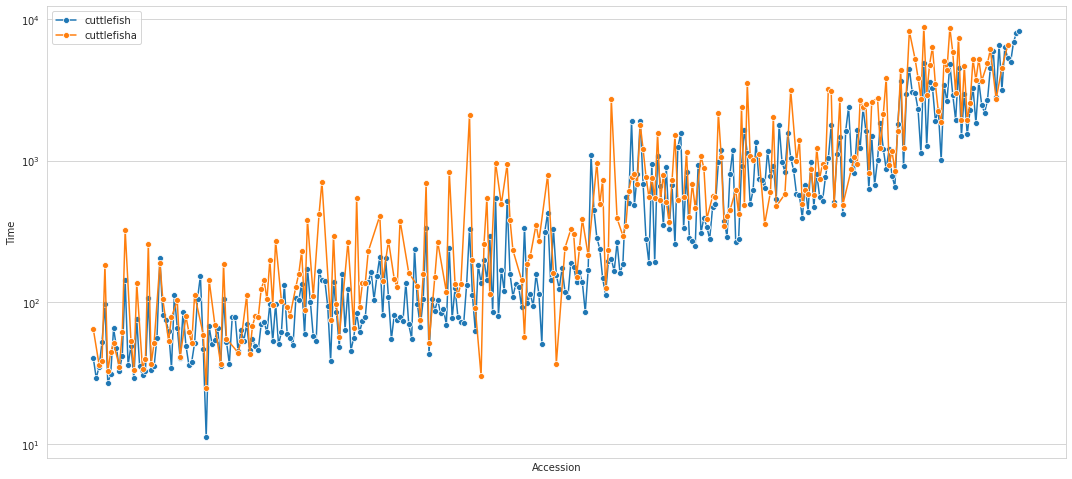

In [95]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 7))

#sns.lineplot(x='item_name', y='bcalm_time', data=df, marker="o", label="bcalm2")
#sns.lineplot(x='item_name', y='bcalm_32G_time', data=df, marker="o", label="bcalm2_32G")
#sns.lineplot(x='item_name', y='ggcat_time', data=df, marker="o", label="ggcat")
sns.lineplot(x='item_name', y='cuttlefish_time', data=df, marker="o", label="cuttlefish")
sns.lineplot(x='item_name', y='cuttlefisha_time', data=df, marker="o", label="cuttlefisha")

sns.set_style("whitegrid")

plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel("Accession")
plt.ylabel("Time")
plt.legend()
plt.tight_layout()
plt.xticks([])  # Hide x-axis labels

fig.set_facecolor("white")
ax.set_facecolor("white")

plt.show()


In [78]:
#acc_size['SRR20706826']
parsed_items['SRR14407446']

{'prefetch_time': '1355',
 'nb_reads': '775105243.5',
 'file_size': '298222842415',
 'fqdump_time': '3240',
 'erc_batch_assembly_dl_time': '9680',
 'erc_batch_assembly_dl_date': '2023-10-06 21:36:07.342390',
 'cuttlefish_x64_mem': '13787.359375',
 'cuttlefish_x64_time': '8137.8289160728455',
 'x64_return_value': '0',
 'bcalm2_x64_mem': '53774.078125',
 'bcalm2_x64_time': '71710.17435121536',
 'ggcat_x64_mem': '12666.546875',
 'ggcat_x64_time': '6078.877882480621'}

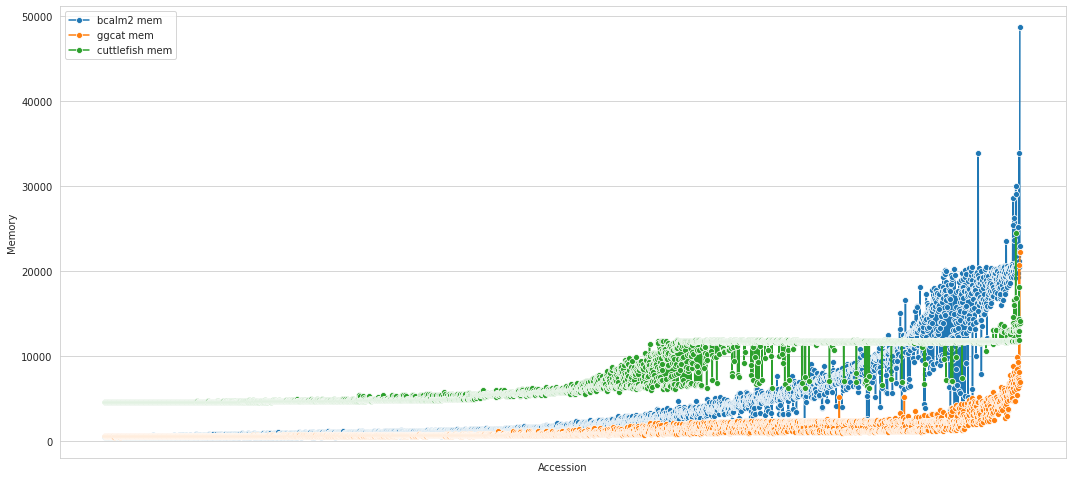

In [35]:
# Same thing with mem
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(x='item_name', y='bcalm_mem', data=df, marker="o", label="bcalm2 mem")
sns.lineplot(x='item_name', y='ggcat_mem', data=df, marker="o", label="ggcat mem")
sns.lineplot(x='item_name', y='cuttlefish_mem', data=df, marker="o", label="cuttlefish mem")

sns.set_style("whitegrid")

#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel("Accession")
plt.ylabel("Memory")
plt.legend()
plt.tight_layout()
plt.xticks([])  # Hide x-axis labels

fig.set_facecolor("white")
ax.set_facecolor("white")

plt.show()
